# Proyek Analisis Data: Customers Dataser
- **Nama:** Salma Maulida Herdiyani
- **Email:** salmamaulida411@gmail.com
- **ID Dicoding:** salmahrdyn

## Menentukan Pertanyaan Bisnis

- Apakah ada tren pertumbuhan atau penurunan dari total peminjaman sepeda berubah dari tahun ke tahun?
- Bagaimana tren peminjaman sepeda per bulan?
- Bagaimana hubungan antara musim dengan peminjaman sepeda?
- Bagaimana hasil klustering dapat digunakan untuk mengidentifikasi dan memahami kelompok pengguna berdasarkan frekuensi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

## Data Wrangling

### Gathering Data

In [11]:
# Upload the zip file containing your dataset manually through the Colab interface
uploaded = files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


In [12]:
# Assuming the uploaded zip file is named 'dataset.zip'
zip_file_name = 'Bike-sharing-dataset.zip'

In [13]:
# Extract the contents of the uploaded zip file
!unzip {zip_file_name}

Archive:  Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [14]:
bike_per_day = pd.read_csv("day.csv")
bike_per_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
bike_per_hour = pd.read_csv("hour.csv")
bike_per_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel Day

In [16]:
bike_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
bike_per_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", bike_per_day.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
bike_per_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel Hour

In [20]:
bike_per_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
bike_per_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", bike_per_hour.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
bike_per_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan Tabel Day


In [24]:
bike_per_day.duplicated().sum()

0

In [25]:
bike_per_day.drop_duplicates(inplace=True)

Pada dataset day, tidak ada data yang terduplikasi

In [26]:
bike_per_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada dataset day, tidak ada data yang missing value

In [27]:
bike_per_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada dataset day, tidak ada data yang mengandung inaccurate value

In [28]:
bike_per_hour.duplicated().sum()

0

In [29]:
bike_per_hour.drop_duplicates(inplace=True)

Pada dataset hour, tidak ada data yang terduplikasi

In [30]:
bike_per_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada dataset hour, tidak ada data yang missing values

In [31]:
bike_per_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada dataset hour, tidak ada data yang mengandung inaccurate values

## Exploratory Data Analysis (EDA)

### Explore data based on its categories.

### Explore Bike per Day

In [32]:
bike_per_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
194,195,2011-07-14,3,0,7,0,4,1,1,0.680833,0.635104,0.476250,0.240667,888,4196,5084
625,626,2012-09-17,3,1,9,0,1,1,2,0.580833,0.553050,0.734583,0.151742,1022,5847,6869
239,240,2011-08-28,3,0,8,0,0,0,1,0.707059,0.647959,0.561765,0.304659,1415,2919,4334
109,110,2011-04-20,2,0,4,0,3,1,1,0.595000,0.564392,0.614167,0.241925,613,3331,3944
219,220,2011-08-08,3,0,8,0,1,1,1,0.765000,0.703283,0.592083,0.192175,846,3480,4326


In [33]:
bike_per_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [34]:
bike_per_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12092,12093,2012-05-24,2,1,5,1,0,4,1,1,0.60,0.5455,0.88,0.0896,9,21,30
1364,1365,2011-03-02,1,0,3,3,0,3,1,1,0.22,0.2121,0.69,0.2836,3,1,4
6949,6950,2011-10-22,4,0,10,4,0,6,0,1,0.38,0.3939,0.66,0.0896,4,4,8
12596,12597,2012-06-14,2,1,6,1,0,4,1,1,0.60,0.6212,0.56,0.2239,4,17,21
9091,9092,2012-01-19,1,1,1,17,0,4,1,2,0.26,0.2273,0.44,0.3284,21,364,385


In [35]:
bike_per_day.loc[bike_per_day["holiday"] == 0, "holiday"] = "Holiday"
bike_per_day.loc[bike_per_day["holiday"] == 1, "holiday"] = "Not a Holiday"

bike_per_day.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [36]:
bike_per_day.loc[bike_per_day["weekday"] == 0, "weekday"] = "Sun"
bike_per_day.loc[bike_per_day["weekday"] == 1, "weekday"] = "Mon"
bike_per_day.loc[bike_per_day["weekday"] == 2, "weekday"] = "Tue"
bike_per_day.loc[bike_per_day["weekday"] == 3, "weekday"] = "Wed"
bike_per_day.loc[bike_per_day["weekday"] == 4, "weekday"] = "Thu"
bike_per_day.loc[bike_per_day["weekday"] == 5, "weekday"] = "Fri"
bike_per_day.loc[bike_per_day["weekday"] == 6, "weekday"] = "Sat"

bike_per_day.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [37]:
bike_per_day.loc[bike_per_day["workingday"] == 0, "workingday"] = "Holiday"
bike_per_day.loc[bike_per_day["workingday"] == 1, "workingday"] = "Working Day"

bike_per_day.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [38]:
bike_per_day.loc[bike_per_day["season"] == 1, "season"] = "Springer"
bike_per_day.loc[bike_per_day["season"] == 2, "season"] = "Summer"
bike_per_day.loc[bike_per_day["season"] == 3, "season"] = "Fall"
bike_per_day.loc[bike_per_day["season"] == 4, "season"] = "Winter"

bike_per_day.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [39]:
bike_per_day.loc[bike_per_day["yr"] == 0, "yr"] = "2011"
bike_per_day.loc[bike_per_day["yr"] == 1, "yr"] = "2012"

bike_per_day.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [40]:
bike_per_day.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [41]:
bike_per_day.loc[bike_per_day["weathersit"] == 1, "weathersit"] = "Clear"
bike_per_day.loc[bike_per_day["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
bike_per_day.loc[bike_per_day["weathersit"] == 3, "weathersit"] = "Light Snow"
bike_per_day.loc[bike_per_day["weathersit"] == 4, "weathersit"] = "Heavy Rain"

bike_per_day.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

### Explore Bike per Hour

In [42]:
bike_per_hour.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [43]:
bike_per_hour.loc[bike_per_hour["weathersit"] == 1, "weathersit"] = "Clear"
bike_per_hour.loc[bike_per_hour["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
bike_per_hour.loc[bike_per_hour["weathersit"] == 3, "weathersit"] = "Light Snow"
bike_per_hour.loc[bike_per_hour["weathersit"] == 4, "weathersit"] = "Heavy Rain"

bike_per_hour.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Apakah ada tren pertumbuhan atau penurunan dari total peminjaman sepeda berubah dari tahun ke tahun?

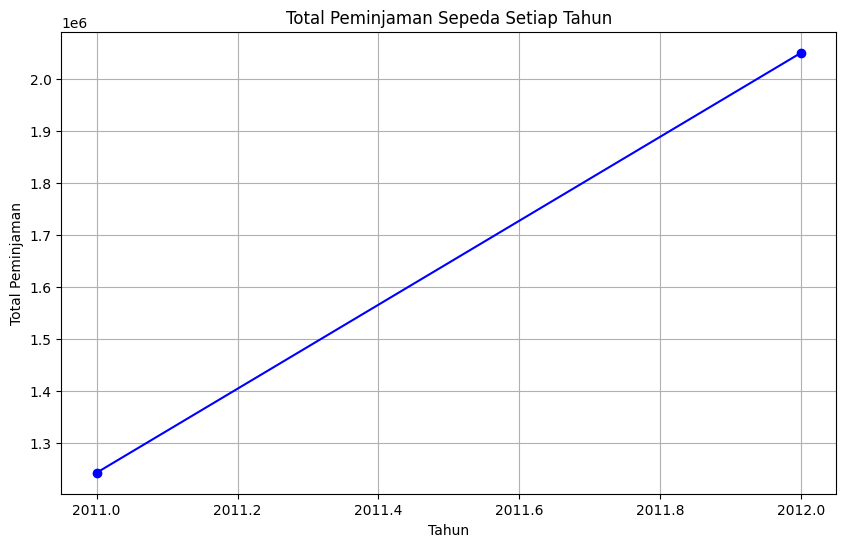

In [44]:
bike_per_day['dteday'] = pd.to_datetime(bike_per_day['dteday'])
bike_per_day['year'] = bike_per_day['dteday'].dt.year

yearly_counts = bike_per_day.groupby('year')['cnt'].sum()

# Plot Line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Total Peminjaman Sepeda Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.show()

Berdasarkan line chart di atas, peminjaman sepeda dari tahun 2011-2012 cenderungmeningkat. Maka, ada tren pertumbuhan total peminjaman sepeda pada tahun 2011-2012.

### Bagaimana tren peminjaman sepeda per bulan?

In [45]:
bike_per_hour['dteday'] = pd.to_datetime(bike_per_hour['dteday'])
bike_per_hour.set_index('dteday', inplace=True)

monthly_counts = bike_per_hour.resample('M').sum()

<ipython-input-45-5d715430e101>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_counts = bike_per_hour.resample('M').sum()


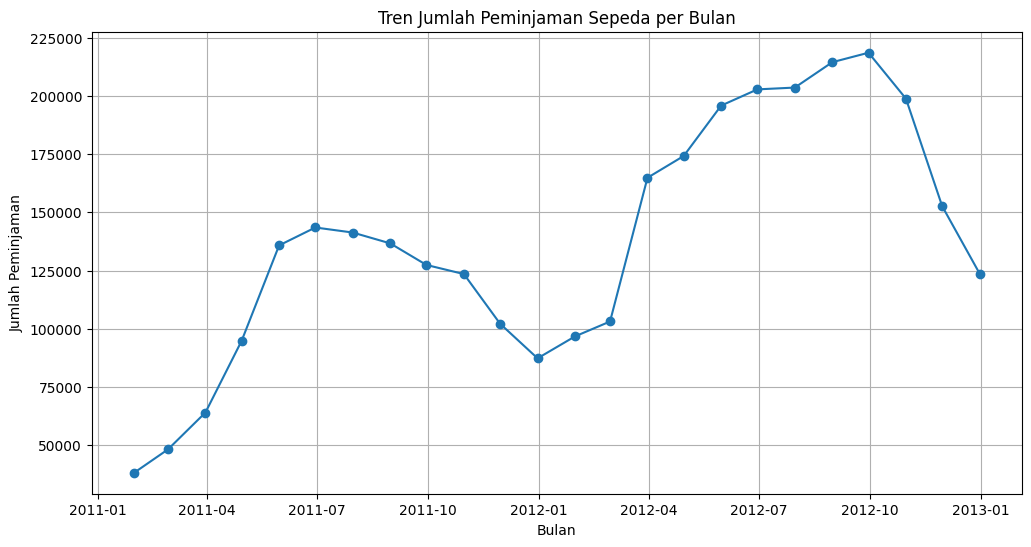

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['cnt'], marker='o')
plt.title('Tren Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

Berdasarkan plot di atas, tren peminjaman sepeda per bulan cenderung berfluktuasi. Peminjaman terendah ada pada rentang bulan Januari hingga April 2011sedangkan peminjaman tertinggi pada bulan Oktober tahun 2012.

### Bagaimana hubungan antara musim dengan jumlah peminjaman sepeda?

In [47]:
byseason_bike = bike_per_day.groupby(by="season").instant.nunique().reset_index()
byseason_bike.rename(columns={"instant": "sum"}, inplace=True)
byseason_bike

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


In [48]:
seasonal_description = bike_per_day.groupby('season')['cnt'].describe()
print(seasonal_description)

          count         mean          std     min     25%     50%      75%  \
season                                                                       
Fall      188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Springer  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer    184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter    178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

             max  
season            
Fall      8714.0  
Springer  7836.0  
Summer    8362.0  
Winter    8555.0  


<ipython-input-57-ad430c868cdc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=bike_per_day, ci=None, palette=season_palette)
<ipython-input-57-ad430c868cdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=bike_per_day, ci=None, palette=season_palette)


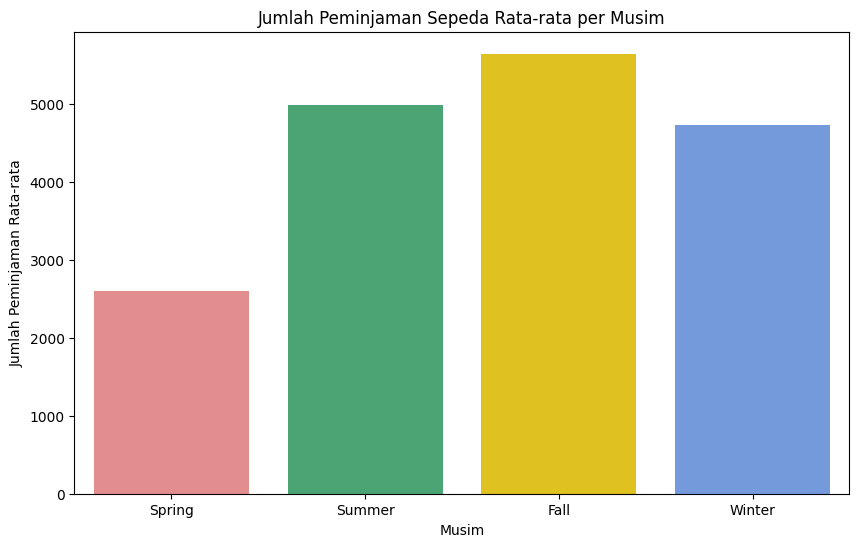

In [57]:
season_palette = {'Fall': 'gold', 'Springer': 'lightcoral', 'Summer': 'mediumseagreen', 'Winter': 'cornflowerblue'}
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=bike_per_day, ci=None, palette=season_palette)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Jumlah Peminjaman Sepeda Rata-rata per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.show()

### Bagaimana hasil klustering dapat digunakan untuk mengidentifikasi dan memahami kelompok pengguna berdasarkan frekuensi penggunaan sepeda?

    hr         cnt Cluster
0    0   53.898072     Low
1    1   33.375691     Low
2    2   22.869930     Low
3    3   11.727403     Low
4    4    6.352941     Low
5    5   19.889819     Low
6    6   76.044138     Low
7    7  212.064649  Medium
8    8  359.011004    High
9    9  219.309491  Medium
10  10  173.668501  Medium
11  11  208.143054  Medium
12  12  253.315934  Medium
13  13  253.661180  Medium
14  14  240.949246  Medium
15  15  251.233196  Medium
16  16  311.983562    High
17  17  461.452055    High
18  18  425.510989    High
19  19  311.523352    High
20  20  226.030220  Medium
21  21  172.314560  Medium
22  22  131.335165     Low
23  23   87.831044     Low


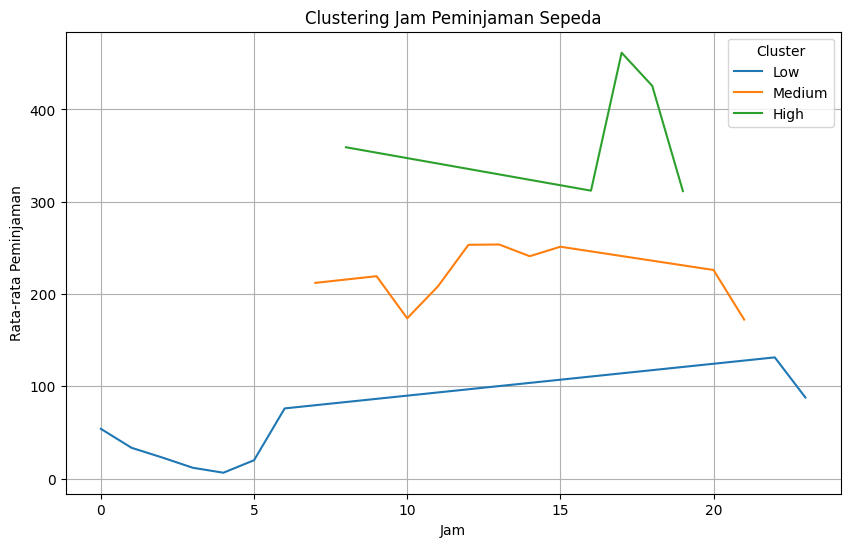

In [58]:
hourly_counts = bike_per_hour.groupby('hr')['cnt'].mean().reset_index()
hourly_counts['Cluster'] = pd.cut(hourly_counts['cnt'], bins=3, labels=['Low', 'Medium', 'High'])
print(hourly_counts)
plt.figure(figsize=(10, 6))
for cluster, data in hourly_counts.groupby('Cluster'):
    plt.plot(data['hr'], data['cnt'], label=cluster)

plt.title('Clustering Jam Peminjaman Sepeda')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Hasil clustering menunjukkan tiga pola peminjaman sepeda per jam. Cluster Low memiliki tingkat peminjaman rendah, Cluster Medium menunjukkan peminjaman sedang yang stabil, sementara Cluster High mencerminkan peminjaman tinggi pada jam-jam tertentu.

## Conclusion

- Apakah ada tren pertumbuhan atau penurunan dari total peminjaman sepeda berubah dari tahun ke tahun?
> Garis diagonal ke kanan pada Line Chart menunjukkan bahwa jumlah peminjaman sepeda meningkat secara konsisten setiap tahunnya. Awalnya, peminjaman mungkin rendah, tetapi seiring waktu, terjadi peningkatan yang signifikan. Grafik ini mencerminkan tren positif dalam penggunaan layanan sepeda berbagi dari tahun ke tahun, dengan kenaikan puncak yang mencerminkan pertumbuhan yang pesat.

- Bagaimana tren peminjaman sepeda per bulan?
> Grafik menunjukkan fluktuasi jumlah peminjaman sepeda per bulan sepanjang periode pengamatan. Pada awal tahun 2011 hingga April, terjadi penurunan yang mencapai titik terendah. Sementara itu, peminjaman mencapai puncak tertinggi pada bulan Oktober 2012.

- Bagaimana hubungan antara musim dengan peminjaman sepeda?
> Grafik menunjukkan bahwa musim gugur memiliki jumlah peminjaman sepeda rata-rata tertinggi dibandingkan musim lainnya. Ini menunjukkan bahwa orang lebih suka bersepeda saat musim gugur. Mungkin karena cuacanya yang nyaman, tidak terlalu panas atau terlalu dingin, serta pemandangan yang indah selama musim tersebut.


- Bagaimana hasil klustering dapat digunakan untuk mengidentifikasi dan memahami kelompok pengguna berdasarkan frekuensi penggunaan sepeda?
> Dalam analisis klustering ini, kita bisa lihat ada tiga kelompok jam peminjaman sepeda berdasarkan rata-rata. Kelompok rendah menunjukkan jam-jam dengan peminjaman sepeda yang sedikit, mungkin pada saat permintaan rendah. Kelompok sedang menandakan jam-jam dengan peminjaman yang stabil, sedangkan kelompok tinggi mencerminkan jam-jam dengan peminjaman paling tinggi.Dengan memahami ciri khas masing-masing kelompok, keputusan dapat diambil dengan lebih baik untuk meningkatkan efisiensi.

